# Image Classification with Convolutional Neural Networks on CIFAR-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
# load cifar 10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# one hot encode target values
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# normalize pixel values
train_images = x_train.astype('float32') / 255
test_images = x_test.astype('float32') / 255

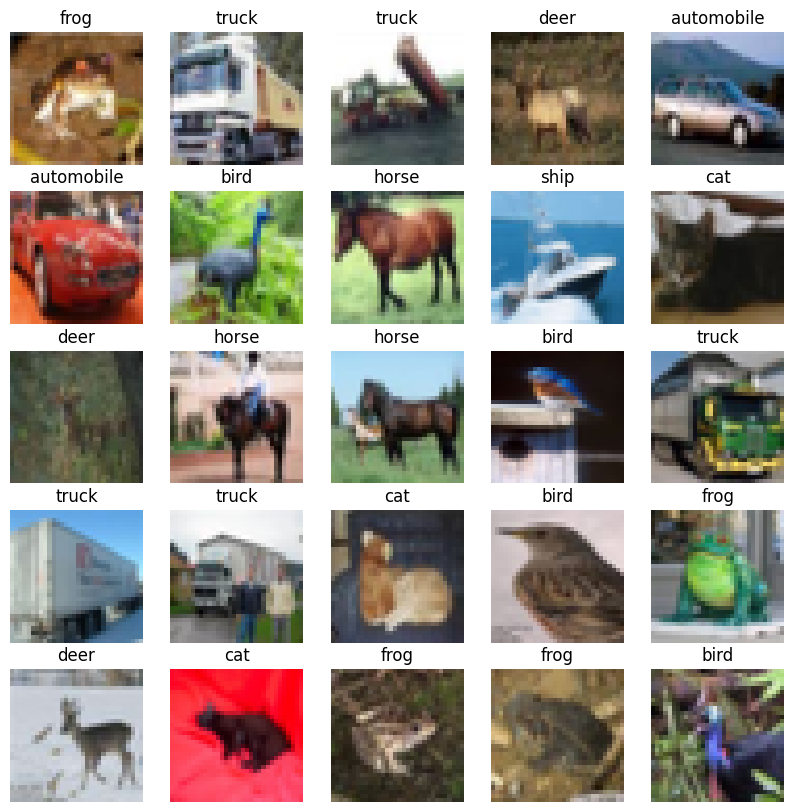

In [4]:
# cifar 10 ten classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                'horse', 'ship', 'truck']

# plot first 25 images with labels
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i])
    # show labels from one hot to categorical
    ax.set_title(class_names[np.argmax(train_labels[i])])
    ax.axis('off')
plt.show()


In [5]:
# build model with one hot encoded labels
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                         

In [6]:
# sgd optimizer with momentum
sgd = SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

/Users/lilf4p/Developer/miniconda3/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
# train on gpu 
tf.device('/device:GPU:0')

early_stopping = EarlyStopping(monitor='val_loss', patience=30)

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels),
                    batch_size=512, callbacks=[early_stopping])

Epoch 1/100


2023-04-28 15:11:32.676975: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


98/98 [==============================] - 5s 46ms/step - loss: 2.2726 - accuracy: 0.1288 - val_loss: 2.2022 - val_accuracy: 0.2512
Epoch 2/100
98/98 [==============================] - 4s 40ms/step - loss: 2.0899 - accuracy: 0.2268 - val_loss: 2.0074 - val_accuracy: 0.2611
Epoch 3/100
98/98 [==============================] - 4s 40ms/step - loss: 1.9564 - accuracy: 0.2762 - val_loss: 1.9547 - val_accuracy: 0.2851
Epoch 4/100
98/98 [==============================] - 4s 40ms/step - loss: 1.8204 - accuracy: 0.3212 - val_loss: 1.7077 - val_accuracy: 0.3829
Epoch 5/100
98/98 [==============================] - 4s 40ms/step - loss: 1.7175 - accuracy: 0.3629 - val_loss: 1.6380 - val_accuracy: 0.4039
Epoch 6/100
98/98 [==============================] - 4s 40ms/step - loss: 1.6311 - accuracy: 0.3972 - val_loss: 1.5124 - val_accuracy: 0.4487
Epoch 7/100
98/98 [==============================] - 4s 40ms/step - loss: 1.5609 - accuracy: 0.4256 - val_loss: 1.4865 - val_accuracy: 0.4573
Epoch 8/100
98/98 

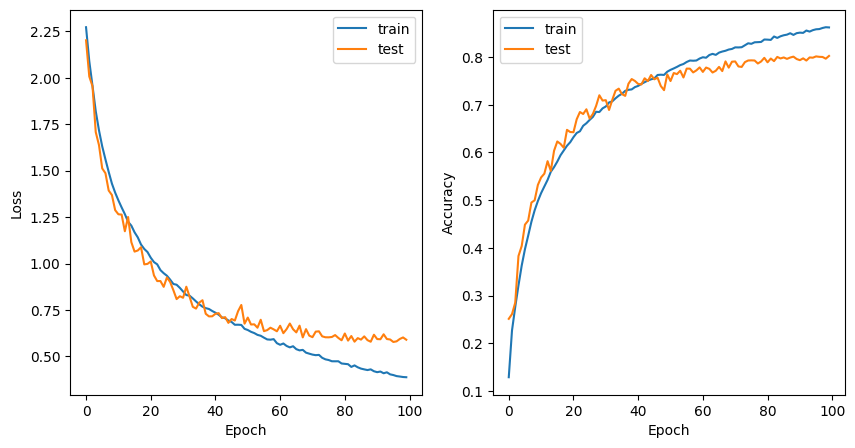

In [8]:
# plot loss and accuracy of validation and training data in subplots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
test_acc

313/313 - 3s - loss: 0.5899 - accuracy: 0.8025 - 3s/epoch - 9ms/step


0.8025000095367432

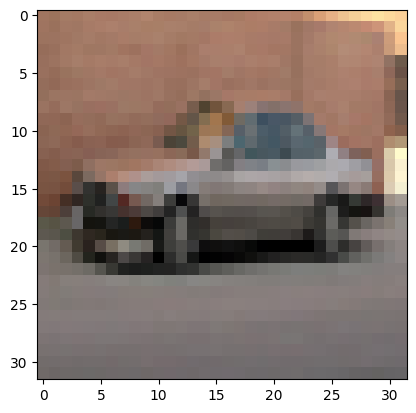

1/1 [==============================] - 0s 15ms/step
automobile: 0.9988769888877869
truck: 0.0011216967832297087
airplane: 1.1299580364720896e-06
ship: 1.418338797520846e-07
cat: 1.6410353631535202e-10


In [11]:
# make a prediction on a random image
random_image = np.random.randint(0, len(test_images))
plt.imshow(test_images[random_image])
plt.show()

# predict class of random image
prediction = model.predict(test_images[random_image].reshape(1, 32, 32, 3))

# ptint the first 5 class labels with highest probability
for i in range(5):
    print(f'{class_names[np.argsort(prediction[0])[-i-1]]}: {prediction[0][np.argsort(prediction[0])[-i-1]]}')

In [12]:
# save the model 
#model.save('cifar10_model.h5')